# Final Project - DATA620 Web Analytics
Daniel Dittenhafer & Justin Hink

## References

Here we load the required references including networkX version 1.11.

In [2]:
import csv

import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt

import networkx as nx
import networkx_helpers as nxh
nx.__version__

'1.11'

## Load Data Set

Here we load the basic data set of cabinet positions and the related nominee information.

In [52]:
imageDest = "../images/"
graphmlDest = "../data/"
dataFile = "../data/TrumpCabinet.csv"
dataset = []
with open( dataFile, "rb" ) as theFile:
    reader = csv.DictReader( theFile )
    for line in reader:
        dataset.append(line)

In [53]:
# Show an example of the loaded data
dataset[1]

{'Cabinet Seat': 'Secretary of Defense',
 'CampaignPosition': '',
 'Citation': '',
 'OrgType': 'Military',
 'Organization': 'U.S. Central Command',
 'PastTrump': '',
 'Person': 'James Mattis',
 'Prior Position': 'General',
 'Wikipedia': 'https://en.wikipedia.org/wiki/James_Mattis',
 'Wikipedia Org': 'https://en.wikipedia.org/wiki/United_States_Central_Command'}

## Graph Construction

In the section, we convert the raw data into edge sets associated with various graph instances.

In [54]:
def makeGraph(data, src, dest, gx=None):
    """Helper function to construct the graph with node types included."""
    if gx is None:
        gx = nx.Graph()
        
    nodeTypes = {}
    for i in data:
        
        if len(i[src]) > 0 and len(i[dest]) > 0:
            gx.add_edge(i[src],i[dest])
            nodeTypes[i[src]] = src
            nodeTypes[i[dest]] = dest
        else:
            print src, ":", i[src]
            print dest, ":", i[dest]
            
    nx.set_node_attributes (gx, "NodeType", nodeTypes)
    
    return gx

In [55]:
people = []
for i in dataset:
    people.append(i["Person"])
    


gxOrgType = makeGraph(dataset, "Person", "OrgType")

gxPriorPosition = makeGraph(dataset, "Person", "Prior Position")

gxOrganization = makeGraph(dataset, "Person", "Organization")

gxCombined = makeGraph(dataset, "Person", "Organization")
gxCombined = makeGraph(dataset, "Person", "OrgType", gx=gxCombined)
gxCombined = makeGraph(dataset, "Person", "Prior Position", gx=gxCombined)

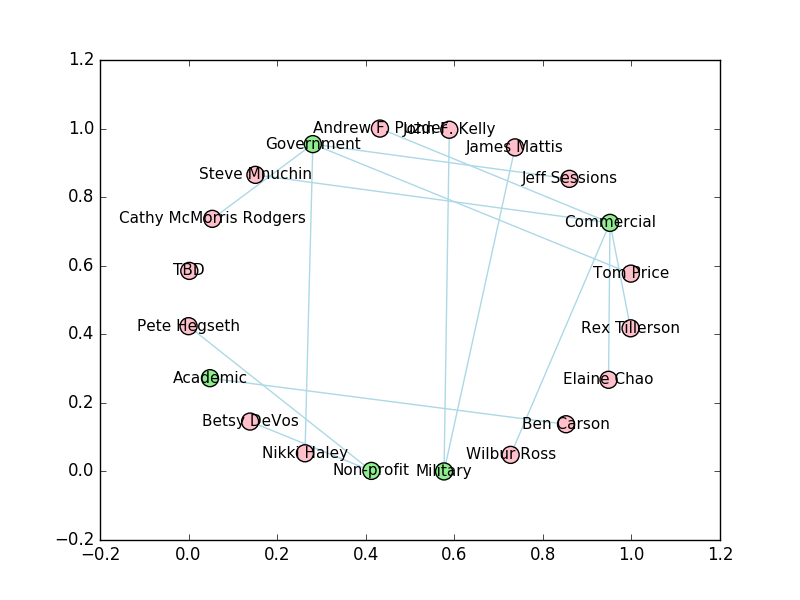

In [56]:
graphFile = imageDest + "DittenhaferHink-DATA620-FinalProj-OrgTypeGraph.png"
nx.write_graphml(gxOrgType, "../data/OrgTypeGraph.graphml")
nxh.renderGraph(gxOrgType, graphFile, False, top=people)

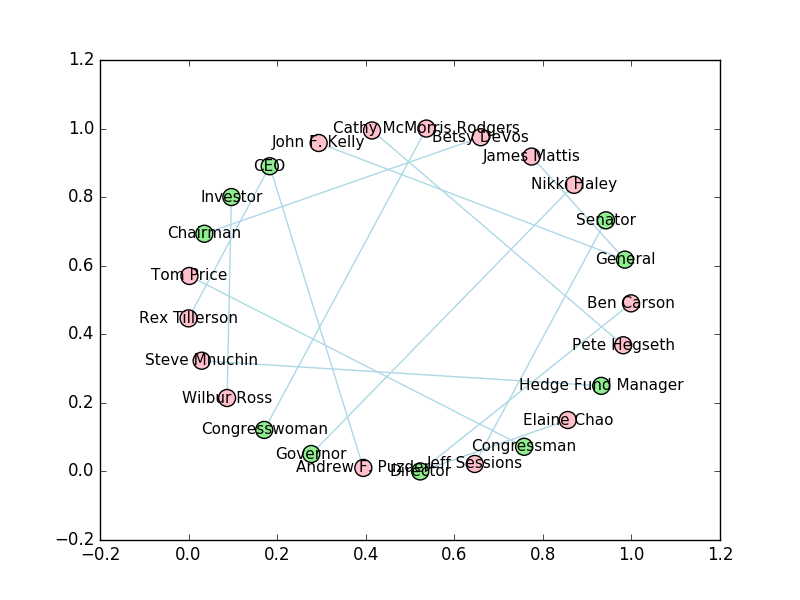

In [15]:
graphFile = imageDest + "DittenhaferHink-DATA620-FinalProj-PriorPositionGraph.png"
nx.write_graphml(gxPriorPosition, "../data/PriorPositionGraph.graphml")
nxh.renderGraph(gxPriorPosition, graphFile, False, top=people)

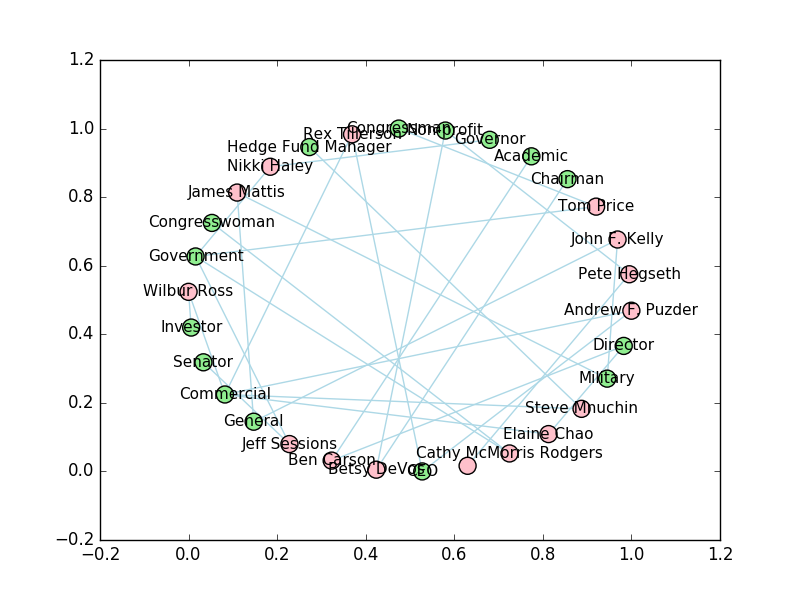

In [16]:
graphFile = imageDest + "DittenhaferHink-DATA620-FinalProj-CombinedGraph.png"
nx.write_graphml(gxCombined, "../data/CombinedGraph.graphml")
nxh.renderGraph(gxCombined, graphFile, False, top=people)

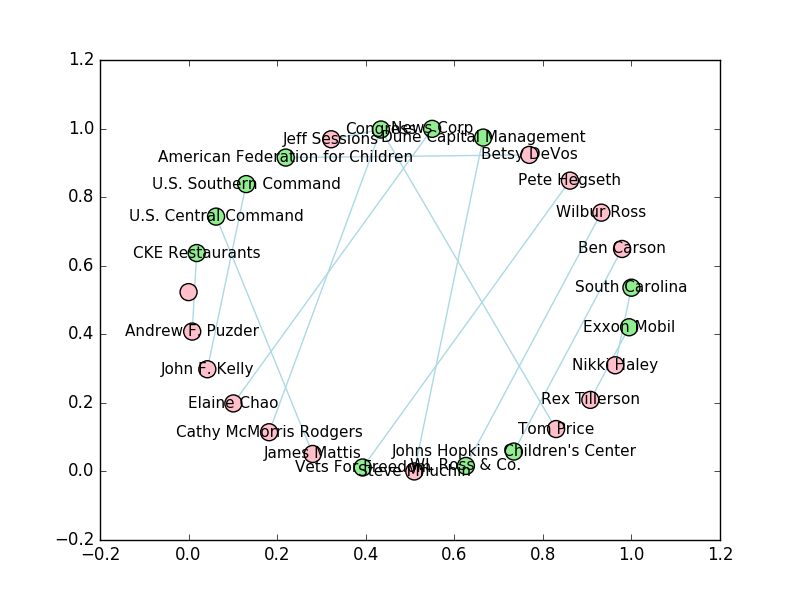

In [17]:
graphFile = imageDest + "DittenhaferHink-DATA620-FinalProj-OrgGraph.png"
nx.write_graphml(gxOrganization, "../data/OrgGraph.graphml")
nxh.renderGraph(gxOrganization, graphFile, False, top=people)

# Text Analyis of Cabinet Related Wikipedia Articles

In [1]:
from wordcloud import WordCloud, STOPWORDS
from bs4 import BeautifulSoup
import urllib2

In [30]:
class WikiWordCloudGenerator(object):
    """Class that provided utilities to generate word clouds from Wikipedia URLs"""

    """generate a wordcloud image from a single wikipedia url"""
    def generate_wordcloud_from_url(self, wiki_url, image_output_file_name):
        raw_text = self.generate_text_from_url(wiki_url)
        self.generate_wordcloud_from_text(raw_text, image_output_file_name)

    """generate a wordcloud image from a string"""
    def generate_wordcloud_from_text(self, text_to_process, image_output_file_name):
        # Generate a word cloud image
        stopwords = set(STOPWORDS)
        stopwords.add("retrieved")
        stopwords.add("ext")
        stopwords.add("state")
        stopwords.add("ready")
        stopwords.add("edit")
        stopwords.add("new")
        stopwords.add("user")
        stopwords.add("true")
        wordcloud = WordCloud(stopwords=stopwords).generate(text_to_process)

        # Display the generated image:
        import matplotlib.pyplot as plt
        plt.imshow(wordcloud)
        plt.axis("off")
        if image_output_file_name:
            plt.savefig(image_output_file_name)
        else:
            plt.show()

    """generate a wordcloud image from a multiple wikipedia urls"""
    def generate_wordcloud_from_multiple_urls(self, wiki_urls, image_output_file_name):
        all_raw_text = []
        for url in wiki_urls:
            all_raw_text.append(self.generate_text_from_url(url))

        all_flattened = ''.join(all_raw_text)
        self.generate_wordcloud_from_text(all_flattened, image_output_file_name)

    """grabs text from a single url"""
    def generate_text_from_url(self, wiki_url):
        header = {'User-Agent': 'Mozilla/5.0'} # Needed to prevent 403 error on Wikipedia
        req = urllib2.Request(wiki_url,headers=header)
        page = urllib2.urlopen(req)
        soup = BeautifulSoup(page)
        return soup.text

    def get_combined_scraped_text(self, wiki_urls):
        all_raw_text = []
        for url in wiki_urls:
            all_raw_text.append(self.generate_text_from_url(url))

        all_flattened = ''.join(all_raw_text)
        return all_flattened

# instantiate
wc_generator = WikiWordCloudGenerator()

### Jeff Sessions

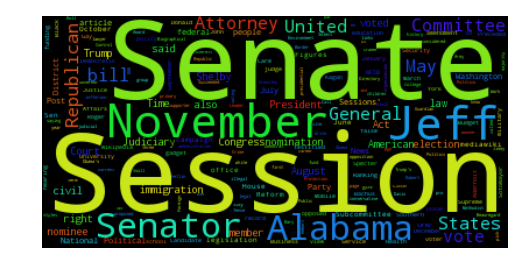

In [31]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Jeff_Sessions"], "")

### James Mattis

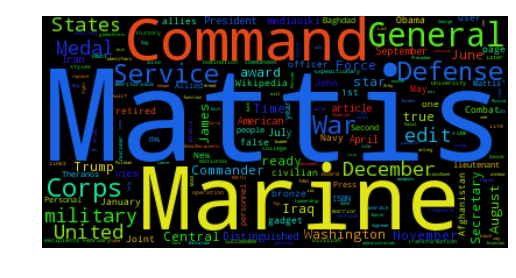

In [9]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/James_Mattis"], "")

### Tom Price

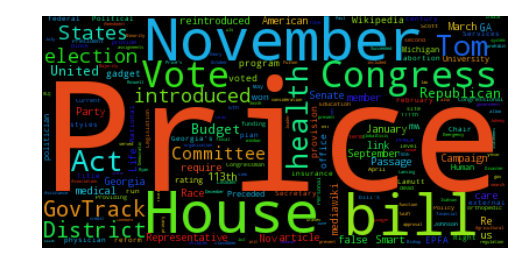

In [32]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Tom_Price_(U.S._politician)"], "")

### Ben Carson

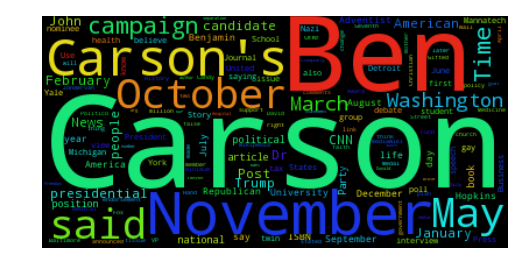

In [33]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Ben_Carson"], "")

### Betsy Devos

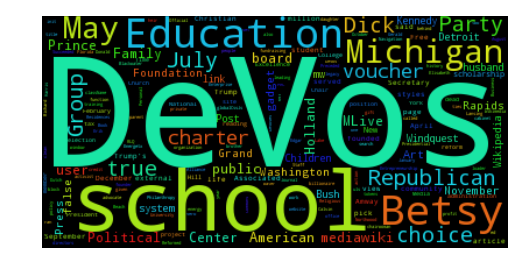

In [24]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Betsy_DeVos"], "")

### Nikki Haley

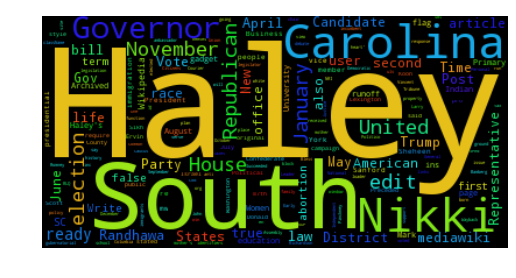

In [13]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Nikki_Haley"], "")

### Elaine Chao

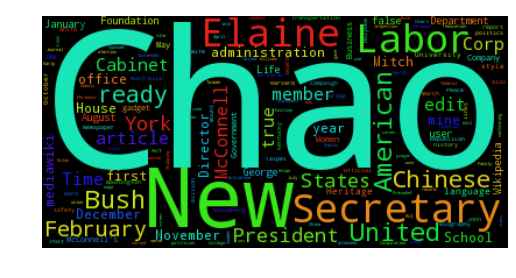

In [14]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Elaine_Chao"], "")

### Steven Mnuchin

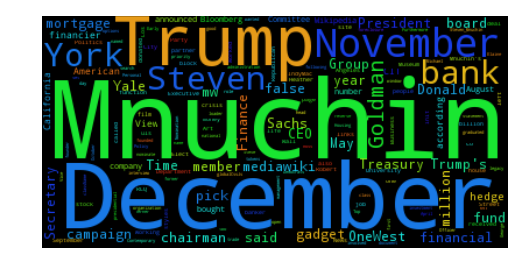

In [34]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Steven_Mnuchin"], "")

### Wilbur Ross

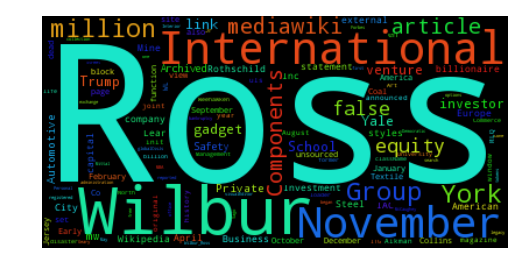

In [35]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Wilbur_Ross"], "")

### Rex Tillerson

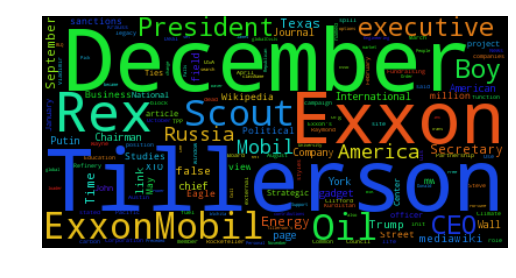

In [36]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Rex_Tillerson"], "")

### Cathy McMorris Rodgers

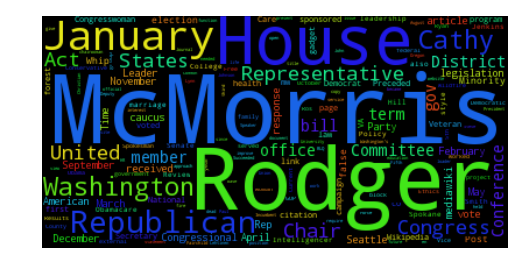

In [37]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Cathy_McMorris_Rodgers"], "")

### Pete Hegseth

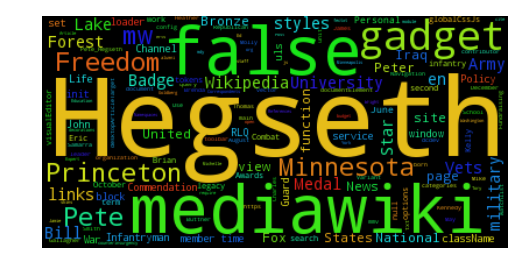

In [38]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Pete_Hegseth"], "")

### Andrew Puzder

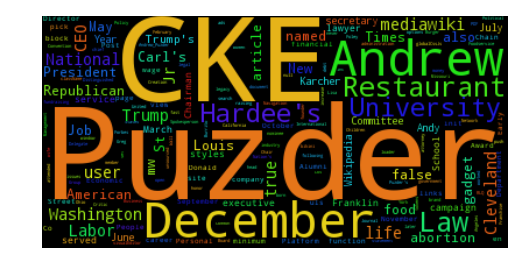

In [28]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Andrew_Puzder"], "")

### All Cabinet Members

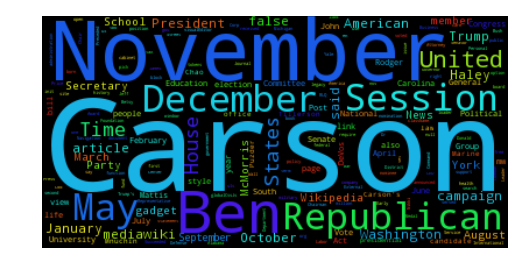

In [39]:
members_urls = ["http://en.wikipedia.org/wiki/Jeff_Sessions",
"http://en.wikipedia.org/wiki/James_Mattis",
"http://en.wikipedia.org/wiki/Tom_Price_(U.S._politician)",
"http://en.wikipedia.org/wiki/Ben_Carson",
"http://en.wikipedia.org/wiki/Betsy_DeVos",
"http://en.wikipedia.org/wiki/Nikki_Haley",
"http://en.wikipedia.org/wiki/Elaine_Chao",
"http://en.wikipedia.org/wiki/Steven_Mnuchin",
"http://en.wikipedia.org/wiki/Wilbur_Ross",
"http://en.wikipedia.org/wiki/Rex_Tillerson",
"http://en.wikipedia.org/wiki/Cathy_McMorris_Rodgers",
"http://en.wikipedia.org/wiki/Pete_Hegseth",
"http://en.wikipedia.org/wiki/Andrew_Puzder"
]

wc_generator.generate_wordcloud_from_multiple_urls(members_urls, "")

### All Cabinet Members' Directly Related Organizations

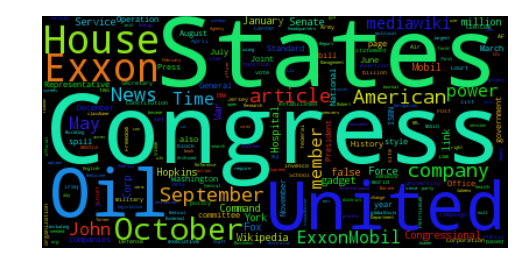

In [40]:
orgs_urls = [
"https://en.wikipedia.org/wiki/United_States_Congress",
"https://en.wikipedia.org/wiki/United_States_Central_Command",
"https://en.wikipedia.org/wiki/Johns_Hopkins_Hospital",
"https://en.wikipedia.org/wiki/Alliance_for_School_Choice",
"https://en.wikipedia.org/wiki/News_Corp",
"https://en.wikipedia.org/wiki/Invesco",
"https://en.wikipedia.org/wiki/ExxonMobil",
"https://en.wikipedia.org/wiki/Vets_For_Freedom",
"https://en.wikipedia.org/wiki/CKE_Restaurants"
]

wc_generator.generate_wordcloud_from_multiple_urls(orgs_urls, "")

### Members + Organizations

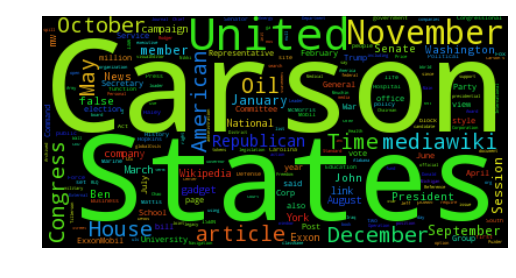

In [41]:
wc_generator.generate_wordcloud_from_multiple_urls(members_urls+orgs_urls, "")